# 9.1 - Introducción a la estadística aplicada a la ciencia de datos

La estadística es la disciplina de las matemáticas que estudia la variabilidad, colección, organización, análisis e interpretación de los datos, así como el proceso aleatorio que los genera siguiendo las leyes de la probabilidad.

Dentro de su amplitud, podemos distinguir tres grandes áreas:

* Estadística descriptiva: Estudia las propiedades y características de diversas *muestras* poblacionales.
* Inferencia estadística: Trata de modelar el comportamiento de la población a partir de un análisis de muestras y ciertas hipótesis probabilísticas sobre la población.
* Teoría de probabilidades: Marco teórico que permite desarrollar una serie de técnicas y procedimientos válidos para ambas.

Llegados a este punto, es natural cuestionarse las fronteras entre la estadística y el *machine learning*. Fundamentalmente, la estadística se centra en el problema de la inferencia, que incluye el modelado de relaciones entre variables y estudio de significatividad estadística de parámetros, como *AB-testing*. Por otra parte, el aprendizaje automático se enfoca en realizar estimaciones certeras sin realizar un estudio *a priori* de las funcionalidades de los parámetros.

En este *notebook*, haremos un breve recorrido por algunas de las nociones elementales que necesitamos conocer para afrontar convenientemente cualquier disciplina del aprendizaje automático.

## 9.1.1 - Nociones de probabilidad

La teoría de probabilidad (o más generalmente la teoría de la medida) es una amplia y rica rama de las matemáticas que, entre otras cuestiones, estudia las *funciones de conjunto* (también conocidas como variables aleatorias), que son las que nos permiten describir y modelar fenómenos naturales para analizar su comportamiento. En nuestro caso, nos limitaremos a revisitar algunos conceptos ampliamente conocidos para que puedan ser empleados a lo largo del curso.

### Tipos de variables

En este caso, podemos hacer dos distinciones:
* Variables discretas: Son aquellas cuyos valores están totalmente inconexos unos de otros (no confundir con que sea finito). Ejemplos de estas variables pueden ser las distribuciones binomiales, exponencial o de Poisson.
* Variables continuas: Son aquellas que, por contra, pueden tomar valores de tal forma que, dados dos cualesquiera de ellos, exista uno en medio. El ejemplo por excelencia de esta categoría es la distribución normal, que toma valores sobre los números reales.

### Funciones de masa y densidad

Entre las múltiples formas de poder representar las variables anteriores, la más habitual suele ser proporcionar la **función de densidad**, que en el caso discreto se conoce como función de masa. Éstas son unas funciones que nos permiten obtener probabilidades para las variables en cuestión, bien integrando (caso continuo) o sumando (caso discreto). Analicemos algún ejemplo:

* Distribuión de Bernoulli: Consideremos el evento asociado al lanzamiento de una moneda. En él, tenemos dos eventos posibles, cara y cruz. Si la moneda está equilibrada, es sencillo ver que la probabilidad asociada al conjunto de eventos es:

$$P[X=\text{cara}]=\frac{1}{2},\quad P[X=\text{cruz}]=\frac{1}{2}$$

  Veamos ahora cómo modelar el lanzamiento de una simple moneda:

c:\Users\Andre\Desktop\Bootcamp\entornovirtual\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Andre\Desktop\Bootcamp\entornovirtual\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Andre\Desktop\Bootcamp\entornovirtual\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\Andre\Desktop\Bootcamp\entornovirtual\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future ver

<Axes: >

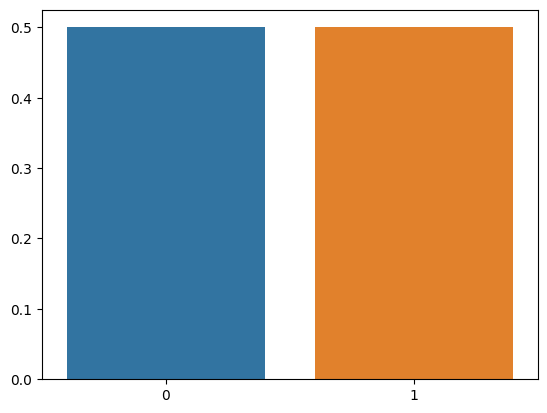

In [1]:
# Librerías
import numpy as np
import seaborn as sns
# Generamos una distribución Bernoulli
n=1 # Binomial con n=1 es Bernoulli
prob=.5 # Moneda balanceada
# Escribimos la función de probabilidad asociada al evento
probs = lambda S: .5
# Analizamos qué ocurre cuando iteramos el experimento
num_reps=int(input("Introduzca el número de repeticiones del lanzamiento de moneda:"))
# Generamos lanzamientos aleatorios y ensamblamos sus probabilidades
var = [np.random.binomial(1,prob) for _ in range(num_reps)]
experiments = [probs(s) for s in var]
sns.barplot(x=var, y=experiments)

* Distribución binomial: Es una distribución de probabilidad discreta que cuenta el número de éxitos en una secuencia de $n$ ensayos de Bernoulli independientes entre sí con una probabilidad fija $p$ de ocurrencia de éxito entre los ensayos. La función de masa se puede obtener como sigue

$$P[X=k]=\left(\begin{array}{c}n\\k\end{array}\right)p^k\cdot (1-p)^{n-k},\quad 0\leq k\leq n.$$

> Ejercicio: ¿Sabrías comprobar que la suma de estas probabilidades es, en efecto, uno? Es decir, la igualdad:
$$ \sum_{k=0}^n P[X=k]=1 $$

Veamos ahora cómo modelizar el evento asociado al lanzamiento independiente de dos dados, estudiando la probabilidad de que el valor $m$ (valor entre uno y seis) del dado salga $k$ veces en $n$ lanzamientos:

c:\Users\Andre\Desktop\Bootcamp\entornovirtual\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Andre\Desktop\Bootcamp\entornovirtual\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Andre\Desktop\Bootcamp\entornovirtual\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: >

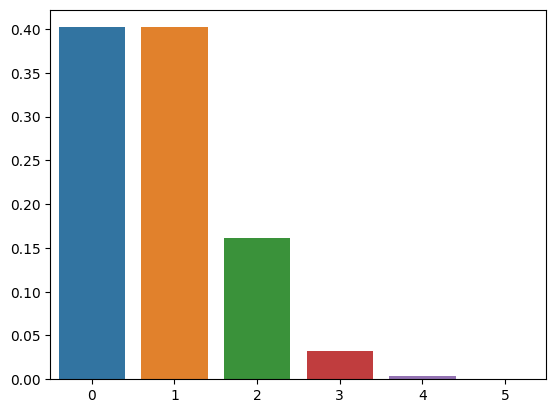

In [2]:
# Requerimientos
import math
# Escribimos la función de probabilidad asociada al evento suma de los dados
prob = lambda n,k,p: (math.factorial(n)/(math.factorial(n-k)*math.factorial(k)))*np.power(p,k)*np.power(1-p,n-k)
# Como cada suceso es equiprobable, la probabilidad será siempre 1/6
p = 1/6
# Introducimos el número de lanzamientos
n = int(input("Introduzca el número de repeticiones del lanzamiento del dado:"))
# Generamos dos números aleatorios equiprobables entre 1 y 6 (dist. uniforme)
mass = [prob(n,k,p) for k in np.arange(n+1)]
sns.barplot(x=np.arange(n+1), y=mass)

* Distribución de Poisson: Es una distribución de probabilidad discreta que expresa, a partir de una frecuencia de ocurrencia media, la probabilidad de que ocurra un determinado número de eventos durante cierto período de tiempo. Concretamente, se especializa en la probabilidad de ocurrencia de sucesos con probabilidades muy pequeñas, o sucesos *raros*. La función de masa se puede obtener como sigue a partir de su parámetro $\lambda$:

$$P[X=k]=\frac{e^{-\lambda}\lambda^{k}}{k!} ,\quad k\geq 0.$$

> Ejemplo: Si el $2\%$ de los libros encuadernados en cierto taller tienen encuadernación defectuosa, para obtener la probabilidad de que $5$ de $400$ libros encuadernados en este taller tengan encuadernaciones defectuosas usamos la distribución de Poisson. Se define $X$ como el número de libros que tengan encuadernación defectuosa entonces $k=5$ y $\lambda$  (el valor esperado de libros defectuosos) es el $2\%$ de $400$, es decir, $8$. Por lo tanto, la probabilidad buscada es:
$$ P[X=5]\approx 0.092 $$

Veamos ahora cómo modelizar esta distribución:

c:\Users\Andre\Desktop\Bootcamp\entornovirtual\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Andre\Desktop\Bootcamp\entornovirtual\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Andre\Desktop\Bootcamp\entornovirtual\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: >

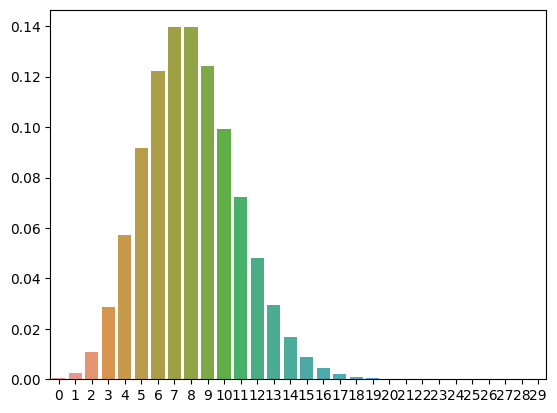

In [4]:
# Escribimos la función de probabilidad asociada al evento suma de los dados
prob = lambda lam, k: (np.exp(-lam)*np.power(lam,k, dtype=float))/(math.factorial(k)) #Vigilad que, como tratamos con números grandes, necesitamos poner lo del dtype a float
# Como hemos visto, lambda es 8
lam = 8
# Generamos todos los valores de k
mass = [prob(lam, k) for k in np.arange(30)]
sns.barplot(x=np.arange(30), y=mass)

* Distribución normal: Es una de las distribuciones de probabilidad de variable continua que con más frecuencia aparece en estadística y en la teoría de probabilidades. La importancia de esta distribución radica en que permite modelar numerosos fenómenos naturales, sociales y psicológicos. La función de masa se puede obtener como sigue a partir de sus parámetro $\mu$ (que se corresponde con lo que veremos que es la media) y $\sigma$ (que se corresponde con la desviación típica):

$$\xi_{(\mu,\sigma)}(x)=\frac{1}{\sigma\sqrt{2\pi}}\exp{-\frac{(x-\mu)^2}{2\sigma^2}}$$

> Ejemplo: Calcule la probabilidad del intervalo $[0,0.25]$ sabiendo que el fenómeno subyacente sigue una distribución normal de media $\mu=0.25$ y varianza $\sigma^2=1$.

In [4]:
# Importamos el módulo necesario para aproximación integral
from scipy.integrate import quad
# Escribimos la función de densidad de la distribución como lambda
normal_pdf = lambda x,mu,sigma: np.exp(-((x-mu)**2)/(2*sigma**2))/(sigma*np.sqrt(2*math.pi))
# Parámetros
mu = 0.25
sigma = 1
lower_bound = 0
upper_bound = 0.25
# Integramos
quad(normal_pdf, lower_bound, upper_bound, args=(mu, sigma))[0]

0.09870632568292374

### Teorema de Bayes

Una de las herramientas más poderosas desde el punto de vista del _machine learning_ es el teorema de Bayes, ya que se ajusta perfectamente a su naturaleza por permitirnos hacer cálculos de probabilidades sobre eventos condicionados sin conocer a priori la distribución conjunta de dos eventos. Introducimos ahora algunos preliminares:

* Probabilidad conjunta: Dados dos sucesos $A$ y $B$, la probabilidad conjunta es una distribución $P$ que modela el resultado de cualquier posible valor de cada uno de estos eventos. Sobre el ejemplo del lanzamiento de dos dados, la probabilidad conjunta sería tomar de forma independiente el lanzamiento de los mismos.
* Probabilidad condicionada: Dados dos sucesos $A$ y $B$, la probabilidad condicionada del suceso $A$ sobre el suceso $B$ es la distribución de probabilidad asociada a $A$ cuando $B$ es conocido. Tomando como referencia el ejemplo de los dados, podríamos considerar la distribución de probabilidad asociada a la suma de los dos dados, sabiendo que el primer dado ha sido un $3$.

El teorema de Bayes afirma que:

$$P(A|B)=\frac{P(B|A)\cdot P(A)}{P(B)}$$

donde:
* $P(A|B)$ es la probabilidad condicionada de que ocurra $A$ conociendo $B$, denominada como probabilidad **a posteriori** de $A$ dado $B$.
* $P(B|A)$ es interpretada como la **probabilidad** de $A$ dado un cierto $B$.
* $P(A)$ y $P(B)$ son las probabilidades de observar $A$ y $B$ sin ningún condicionante, conocidas como **probabilidades marginales**.

Es muy habitual trabajar para el cálculo de estas probabilidades con tablas de frecuencias.

> Ejemplo: Tomemos el popular dataset del repositorio UCI [*adult*](https://archive.ics.uci.edu/dataset/2/adult). ¿Cuál es la probabilidad de que, sabiendo que una persona está divorciada, tenga un doctorado?

Vayamos paso por paso calculando lo que necesitamos: Sea primero $A$ el evento asociado al nivel de estudios de una persona, y $B$ el evento asociado a su estado civil. Para hacer la lectura de los datos, podemos usar el siguiente *snippet* de código:


In [6]:
# Dependencias
import os
import re
import pandas as pd
import wget

# Descargamos el fichero que contiene los datos a nuestro directorio activo
wget.download('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')
# Descargamos la metadata asociada al conjunto de datos
wget.download('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names')
# Leemos datos
with open(os.path.join(os.getcwd(),'adult.data'),'r') as f:
    data = f.read().splitlines() # Dividimos el texto por saltos de línea
    data = [elem.split(', ') for elem in data] # Dividimos cada línea por las comas y removemos líneas vacías
# Leemos metadata
with open(os.path.join(os.getcwd(),'adult.names'),'r') as f:
    metadata = f.read().splitlines()
# Regex
regex_fn = lambda text: re.findall('^[a-zA-Z-]+:{1}', text)
reg_text_fn = lambda text : re.findall('[a-zA-Z- ]+', text)
metadata_list = [regex_fn(elem)[0] for elem in metadata if regex_fn(elem)]
col_names = [reg_text_fn(elem)[0] for elem in metadata_list if reg_text_fn(elem)] + ['label']
# Construimos el objeto pd.DataFrame
df = pd.DataFrame(data=data, columns=col_names)
# Tabla de frecuencias
freq_table = pd.crosstab(index=df['marital-status'], columns=df['education'])

Bajo estas condiciones, nos están preguntando por $P(A|B)$, que como sabemos depende de tres cantidades:

* $P(A)$: Para obtener la probabilidad marginal de encontrar a una persona con doctorado, debemos ignorar los estados civiles en la tabla de frecuencias, y para ello lo haremos como sigue:

In [7]:
freq_table.loc[:,'Doctorate']

marital-status
Divorced                  33
Married-AF-spouse          0
Married-civ-spouse       286
Married-spouse-absent      7
Never-married             73
Separated                  7
Widowed                    7
Name: Doctorate, dtype: int64

In [10]:
marginal_A = df.groupby('education').count()['label']
p_A = marginal_A.loc['Doctorate']/np.sum(marginal_A.values)
print(p_A)

0.012683885630048217


* $P(B)$: Para obtener la probabilidad marginal de encontrar a una persona divorciada, debemos ignorar el nivel educativo en la tabla de frecuencias, y para ello lo haremos como sigue:

In [11]:
marginal_B = df.groupby('marital-status').count()['label']
p_B = marginal_B.loc['Divorced']/np.sum(marginal_A.values)
print(p_B)

0.1364515831823347


* $P(B|A)$: Para obtener la probabilidad condicional de encontrar a una persona divorciada entre aquellas que tienen un doctorado, hacemos:

In [12]:
cond_B_A = freq_table.loc[:,'Doctorate']
p_B_A = cond_B_A['Divorced']/np.sum(cond_B_A.values)
print(p_B_A)

0.07990314769975787


Ya estamos listos para obtener la probabilidad deseada:

In [13]:
prob_A_B = (p_B_A*p_A)/p_B
print(prob_A_B)

0.007427413909520595


### Máxima verosimilitud

Una de las formas más habituales de pensar en _machine learning_ es la de la máxima verosimilitud. Este concepto aparece de forma natural en el teorema de Bayes, y lo usremos para hacer estimaciones probabilísticas de parámetros desconocidos sobre muestras aleatorias.

Supongamos que tenemos un modelo con parámetros $\pmb{\theta}$ y una colección de datos $X$. Puesto que los datos son provistos de antemano, si queremos encontrar los valores esperados de nuestros parámetros dados esos datos, nos piden simplemente encontrar

$$\text{argmax}\,P(\pmb{\theta}|X)$$

Por la regla de Bayes, esto se traduce a

$$\text{argmax}\,\frac{P(X|\pmb{\theta})\cdot P(\pmb{\theta})}{P(X)}$$

Puesto que la probabilidad $P(X)$ de generar unos determinados datos $X$ no depende de los parámetros $\pmb{\theta}$, y además no tenemos asunciones *a priori* sobre los parámetros $\pmb{\theta}$, la probabilidad $P(\pmb{\theta})$ tampoco depende de $\pmb{\theta}$, la expresión anterior se puede reducir a

$$\hat{\pmb{\theta}}=\text{argmax}\,P(X|\pmb{\theta})$$

Por convención, a la probabilidad anterior se la conoce como verosimilitud (*likelihood*). Como veremos a continuación, una práctica muy habitual al trabajar con éstas probabilidades en experimentos repetidos es que, al ser experimentos independientes, la probabilidad conjunta se pueda expresar como producto de las probabilidades de cada experimento.

> Ejemplo: Supongamos que tenemos un experimento en el cual $0<\theta<1$ representa la probabilidad de que, dado un determinado lanzamiento de una moneda, resulte cara (y por tanto $1-\theta$ es la probabilidad de obtener cruz). Supongamos que $X$ es un conjunto de datos donde se registran $n$ lanzamientos independientes de una moneda, donde $n_H>0$ han sido cara y $n_T>0$ han sido cruz (evidentemente $n=n_H+n_T$). Puesto que cada lanzamiento de moneda es independiente, la probabilidad conjunta la podemos expresar como:

$$P(X|\theta)=\prod_{k=1}^nP(X_i|\theta)=\theta^{n_H}\cdot (1-\theta)^{n_T}$$

> Para encontrar el máximo de esta función con respecto de $\hat{\theta}$, un *truco* habitual es usar logaritmos antes de derivar e igualar a cero, ya que ésta es una función estrictamente creciente (y por tanto respeta los máximos y mínimos de una función) y descompone productos en sumas, que son más fáciles de derivar:

$$\frac{\partial}{\partial \theta}\log{P(X|\theta)}=\frac{\partial}{\partial \theta}\left[n_h\cdot\log{\theta}+n_T\cdot\log{(1-\theta)}\right]=\frac{n_H\cdot(1-\theta)-n_T\cdot\theta}{\theta\cdot(1-\theta)}$$

> Para que esta última expresión sea igual a cero, es preciso que el numerador sea cero, de donde se obtendría que

$$\hat{\theta}=\frac{n_H}{n_H+n_T}$$

> Nótese que, por tanto, el resultado más verosímil para el siguiente lanzamiento es simplemente la regla de Laplace, casos observados entre casos posibles. ¿Qué habría pasado a $\hat{\theta}$ si $\theta$ representa la probabilidad de obtener cruz, en lugar de cara?

Todos estos cálculos previos a la resolución de un problema predictivo son cruciales para poder sacar el máximo partido a los modelos de *machine learning* y *deep learning* y acelerar al convergencia de los mismos. Veamos cómo modelizar el ejemplo anterior:

In [14]:
# Introducimos el número de lanzamientos
n = int(input("Introduzca el número de repeticiones del lanzamiento de la moneda:"))
# Simulamos una serie de lanzamientos de monedas
coin_flips = np.random.randint(0,2,n)
# Asumimos que 0 es cara y 1 es cruz
heads_flips = len(coin_flips[coin_flips==0])
tails_flips = len(coin_flips[coin_flips==1])
# Definimos el EMV
hat_theta = lambda heads, tails: heads/(heads+tails)
# EMV
print(f"El estimador máximo verosímil de la probabilidad de lanzar cara es: {hat_theta(heads_flips, tails_flips)}")

El estimador máximo verosímil de la probabilidad de lanzar cara es: 0.51


> Ejercicio: Obtenga para un cierto rango de valores de $n$ los estimadores máximo verosímiles, y grafique su tendencia.

c:\Users\Andre\Desktop\Bootcamp\entornovirtual\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Andre\Desktop\Bootcamp\entornovirtual\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Andre\Desktop\Bootcamp\entornovirtual\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Andre\Desktop\Bootcamp\entornovirtual\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

<Axes: >

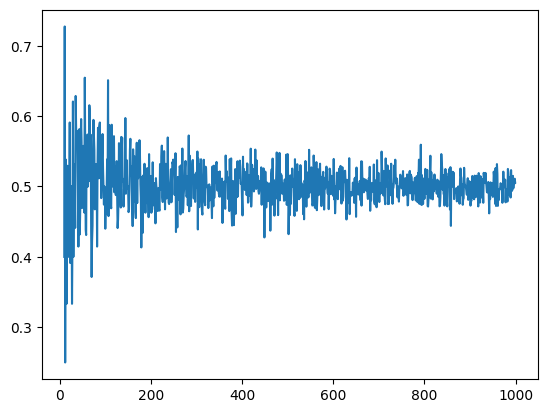

In [15]:
# Lista de almacenaje
theta_list = []
# Simulamos lanzamientos y guardamos el EMV
for n in range(10,1000):
    # Simulamos una serie de lanzamientos de monedas
    coin_flips = np.random.randint(0,2,n)
    # Asumimos que 0 es cara y 1 es cruz
    heads_flips = len(coin_flips[coin_flips==0])
    tails_flips = len(coin_flips[coin_flips==1])
    # EMV
    theta_list.append(hat_theta(heads_flips, tails_flips))
# Gráfica
sns.lineplot(x=np.arange(10,1000), y=theta_list)

## 9.1.2. - Nociones de estadística

### Estadística descriptiva

En esta sección, estudiaremos determinados parámetros que nos permitirán estudiar muestras de valores. Concretamente, los dividiremos en dos secciones:

* Parámetros de centralización.
* Parámetros de dispersión.

En el primer grupo encontramos elementos como la media, la mediana, la moda o los percentiles, mientras que en el segundo están la varianza o el coeficiente de kurtosis, entre otros.

In [16]:
from sklearn.datasets import load_wine
X, _ = load_wine(return_X_y=True, as_frame=True)

Con el método `describe` de `pandas`, se puede obtener esta información de forma muy cómoda:

In [17]:
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


En caso de que tengamos una lista o un array de `numpy`, podríamos proceder como sigue:

In [18]:
# Generamos lista aleatoria
sample_list = [np.random.normal() for _ in range(1000)]
# Calculamos media
mean = np.mean(sample_list)
# Calculamos desviación típica
std = np.std(sample_list)
# Calculamos cuantiles
quant = np.quantile(sample_list, [.1,.25,.5,.75,.9])
# Calculamos máximo y mínimo
min, max = np.min(sample_list), np.max(sample_list)

Una de las aplicaciones más interesantes de estos parámetros descriptivos es la construcción de los conocidos como **rangos intercuartílicos** y el estudio de **valores atípicos** (*outliers*). Vayamos paso a paso:

* Rango intercuartílico: Se define como la distancia existente entre el percentil 75 (frecuentemente denotado como $Q_3$) y el percentil 25 (frecuentemente denotado como $Q_1$) de la distribución: $\text{IQR}=Q_3-Q_1$.
* Valores atípicos: Son aquellos elementos que no se corresponden con la distribución esperada por tener valores excesivamente altos o bajos. Esta definición es muy ambigüa, y para ello consideraremos que un valor atípico aquel que se salga del intervalo:

$$ \left[Q_1-1.5\cdot\text{IQR}, Q_3+1.5\cdot\text{IQR}\right] $$

Con estos valores atípicos, existen dos operaciones que podemos realizar:

* Eliminar los registros con valores atípicos en una determinada variable.
* Reemplazar los valores atípicos de esa variable por el valor límite del intervalo correspondiente. Es decir, si por ejemplo el valor está fuera del intervalo por ser superior a $Q_3+1.5\cdot\text{IQR}$, lo reemplazamos por $Q_3+1.5\cdot\text{IQR}$, y respectivamente con el límite inferior.

Es muy habitual hacer un análisis de valores atípicos tomando como referencia algunas variables que sabemos que están altamente correlacionadas con la variable respuesta que queremos estudiar, agrupando por las mismas. Exploraremos este punto más en detalle en la seción de ejercicios.

### Correlación. Ajuste de normalidad

Cuando se trabaja con múltiples variables para analizar el comportamiento de un fenómeno natural, es importante asegurarnos de que no estemos introduciendo información irrelevante, y tener en cuénta qué variables pueden ser potencialmente más valiosas. Para ello, se hace uso de la **correlación lineal**, que precisamente lo que mide es, dado un cierto incremento en una variable, cómo varía el resto. Con ello, para cada pareja de variables, se construye un índice de $-1$ a $1$, en el cual:

* La proximidad a $-1$ se identifica con una fuerte correlación negativa.
* La proximidad a cero se identifica con una baja o nula correlación.
* La proximidad a $1$ se identifica con una fuerte correlación positiva.


Veremos en los ejercicios cómo eliminar de forma automatizada variables altamente correlacionadas.

Otra cuestión a tener en cuenta es que, debido a la naturaleza de multitud de modelos de *machine learning*, es conveniente que la variable a predecir tenga una distribución que se ajuste a la normal en cierto modo. Para ello, un indicador relevante es cómo evolucionan los percentiles de la distribución con respecto a una distribución normal "ideal" en base a su media y varianza; es lo que se conoce como **QQ-plot**.

C:\Users\Andre\AppData\Local\Temp\ipykernel_15964\3444835553.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Press_mm_hg'], fit=stats.norm)
c:\Users\Andre\Desktop\Bootcamp\entornovirtual\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Andre\Desktop\Bootcamp\entornovirtual\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operat


 mu = 755.52 and sigma = 7.40



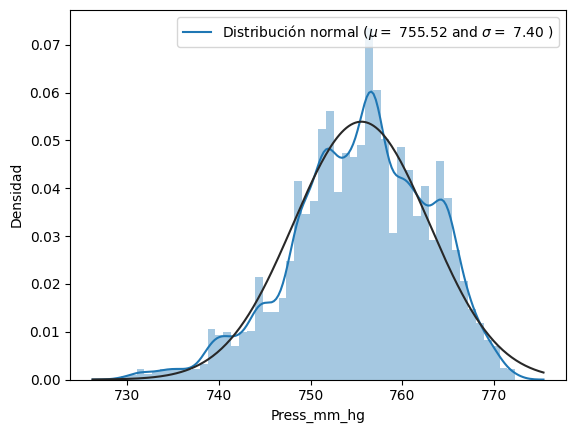

In [19]:
# Dependencias
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import wget
## Descargamos el fichero que contiene los datos a nuestro directorio activo
wget.download('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')
# Leemos fichero
df = pd.read_csv('energydata_complete.csv')

sns.distplot(df['Press_mm_hg'], fit=stats.norm)

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(df['Press_mm_hg'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Distribución normal ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Densidad')
plt.show()

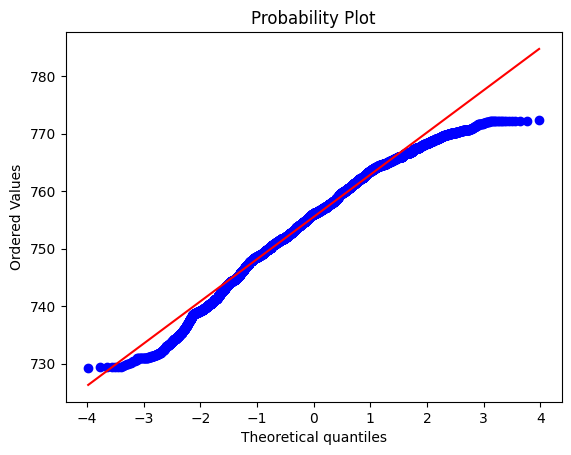

In [20]:
#Mostramos QQ-plot
fig = plt.figure()
res = stats.probplot(df['Press_mm_hg'], plot=plt)
plt.show()

En caso de que no sea así, existen procedimientos como la **transformación de Box-Cox**.

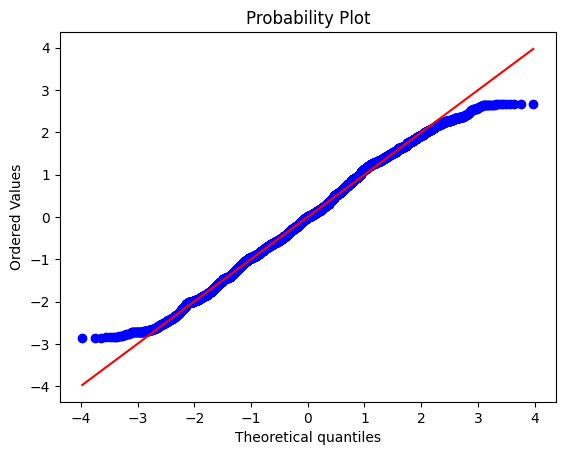

In [21]:
# Requerimientos
from scipy.stats import boxcox
#Transformamos variable
df['Press_mm_hg_bc'] = boxcox(df['Press_mm_hg'])[0]
# Parámetros normales
(mu, sigma) = stats.norm.fit(df['Press_mm_hg_bc'])
# Estandarizamos valores
df['Press_mm_hg_bc'] = (df['Press_mm_hg_bc']-mu)/sigma
#QQ-plot
fig = plt.figure()
res = stats.probplot(df['Press_mm_hg_bc'], plot=plt)
plt.show()

### Teorema Central del Límite (TCL)

Uno de los resultados fundamentales de la estadística es el TCL, en el que se afirma que si un experimento es repetido bajo las mismas características y condiciones (esto es, dispongamos de una sucesión finita de variables aleatorias independientes e idénticamente distribuídas $\{X_k\}_{k=0}^n$ con media $\mu$ y varianza finita $\sigma^2<\infty$), la distribución asociada a las medias muestrales converge a una distribución normal de media $\mu$ y desviación típica $\frac{\sigma}{\sqrt{n}}$.

La cuestión es, ¿cómo podemos interpretar este resultado desde la perspectiva del _machine learning_? Recordemos que, desde nuestro punto de vista, no tenemos conocimiento _a priori_ de las variables, con lo cual este resultado es extremadamente útil para poder aproximar nuestras muestras de variables mediante la distribución normal.

Tomemos como ejemplo este conjunto de datos sobre información relativa a temperatura y humedad de distintas dependencias de un hogar (para más información, consultar [este enlace](https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction)):

In [22]:
# Dependencias
import re
import pandas as pd
## Descargamos el fichero que contiene los datos a nuestro directorio activo
wget.download('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')
# Leemos fichero
df = pd.read_csv('energydata_complete.csv')

Trabajaremos ahora con *batches* de información a partir de esta gran muestra de datos, tomando como referencia la variable `T1` (temperatura de la cocina en Celsius), de forma que tomaremos grupos de muestras de 32 elementos, resultando así 616 muestras. Traduciendo esto al TCL, disponemos de 616 variables aleatorias con distribución desconocida, pero que son independientes e idénticamente distribuídas al tratarse del mismo lugar. Realizaremos los siguientes pasos:

* Tomamos cada una de las 616 posibles muestras distintas de tamaño 32.
* Para cada una de ellas, tomamos el valor medio de los valores.
* Vemos qué distribución tiene el aglomerado de todas esas medias.

En virtual del TCL, debería aproximarse a una distribución normal. Veamos si así es:

c:\Users\Andre\Desktop\Bootcamp\entornovirtual\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Andre\Desktop\Bootcamp\entornovirtual\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


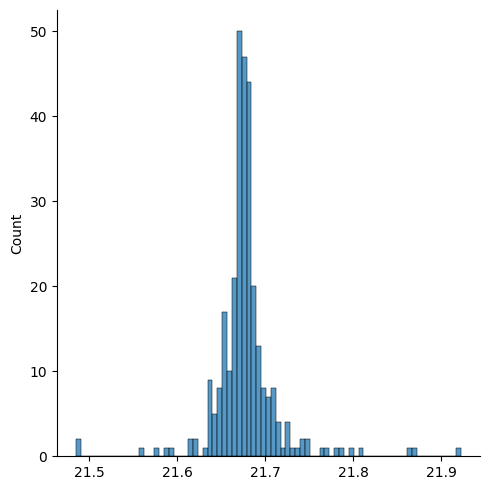

In [23]:
# Dependencias
import seaborn as sns
# Parámetros
variable = 'T1'
batch_size = 32
num_batches = len(df)//batch_size
means = []
# Barajamos la información
df = df.sample(frac=1)
# Iteramos sobre los batches
for idx in range(num_batches):
    means.append(np.mean(df.loc[batch_size*idx:batch_size*(idx+1),variable]))
# Dibujamos
sns.displot(means)

En efecto, el TCL nos sirve para poder modelizar nuestros experimentos de _machine learning_, tratando nuestras variables continuas en términos promedios como distribuciones normales.